In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Muktha\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Muktha\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('C:\\Users\\Muktha\\Documents\\Machine Learning\\Datasets\\Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [9]:
df.duplicated().sum()

0

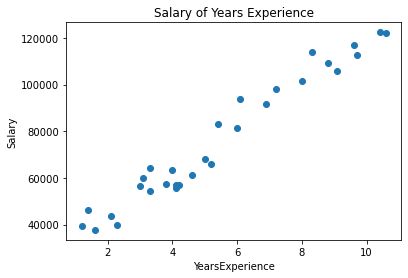

In [10]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Salary of Years Experience')
plt.show()

In [11]:
X=df[['YearsExperience']]

y=df['Salary']

In [12]:
X.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.shape

(24, 1)

In [15]:
X_test.shape

(6, 1)

In [16]:
X_train.corr()

,YearsExperience
YearsExperience,1.0


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linear=LinearRegression()

In [19]:
linear.fit(X_train,y_train)

LinearRegression()

In [20]:
print("m = ",linear.coef_) # y=mx+b

print("b = ",linear.intercept_)

m =  [9423.81532303]
b =  24380.20147947369


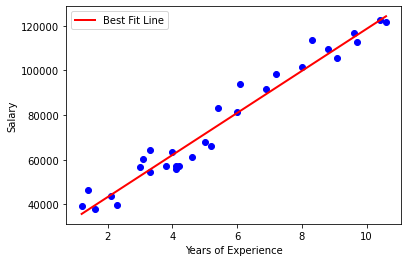

In [21]:
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.plot(df['YearsExperience'].values, linear.predict(X), color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [22]:
y_pred= linear.predict(X_test)

In [23]:
print("Predicted Salaries: ", y_pred)

print("Actual Salaries: ",list(y_test))

Predicted Salaries:  [115791.21011287  71499.27809463 102597.86866063  75268.80422384
  55478.79204548  60190.69970699]
Actual Salaries:  [112636.0, 67939.0, 113813.0, 83089.0, 64446.0, 57190.0]


# REGRESSION METRICS

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
y_test.values

array([112636.,  67939., 113813.,  83089.,  64446.,  57190.])

In [26]:
# mean absolute error

mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error(MAE):", mae)

Mean Absolute Error(MAE): 6286.453830757745


In [27]:
# mean squared error

mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error(MSE):", mse)

Mean Squared Error(MSE): 49830096.855908334


In [28]:
# r2 score 

score=r2_score(y_test,y_pred)
print("R2 Score:", score)

R2 Score: 0.9024461774180498


In [29]:
X_test.shape

(6, 1)

In [30]:
# Adjusted R2 score

adjusted_r2=1-(((1-score)*(6-1))/(6-1-1))
print("Adjusted r2 score:", adjusted_r2)

Adjusted r2 score: 0.8780577217725622


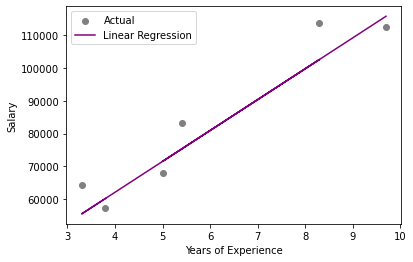

In [31]:
plt.scatter(X_test, y_test, color='gray', label='Actual')
plt.plot(X_test.values, y_pred, color='purple', label='Linear Regression')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

# LASSO,RIDGE,ELASTICNET Regression

In [32]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [33]:
ridge=Ridge(alpha=1.0)
lasso=Lasso(alpha=1.0)
elastic=ElasticNet(alpha=1.0,l1_ratio=0.5)


In [34]:
ridge.fit(X_train,y_train)

Ridge()

In [35]:
lasso.fit(X_train,y_train)

Lasso()

In [36]:
elastic.fit(X_train,y_train)

ElasticNet()

In [37]:
y_pred_ridge=ridge.predict(X_test)
y_pred_lasso=lasso.predict(X_test)
y_pred_elastic=elastic.predict(X_test)

In [38]:
models = {
    "Linear Regression": (mse, score),
    "Ridge": (mean_squared_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)),
    "Lasso": (mean_squared_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)),
    "ElasticNet": (mean_squared_error(y_test, y_pred_elastic), r2_score(y_test, y_pred_elastic))
}

In [39]:
results = pd.DataFrame(models,index=["MSE","R2"]).T

print(results)

                            MSE        R2
Linear Regression  4.983010e+07  0.902446
Ridge              4.997485e+07  0.902163
Lasso              4.983043e+07  0.902446
ElasticNet         5.299367e+07  0.896253


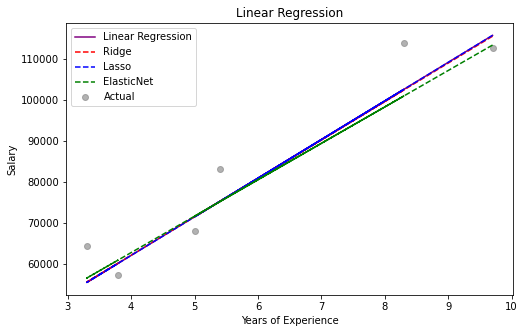

In [40]:
plt.figure(figsize=(8,5))

plt.plot(X_test.values.flatten(),y_pred,label='Linear Regression',color='purple')

plt.plot(X_test.values.flatten(),y_pred_ridge, label="Ridge", linestyle="--", color="red")
plt.plot(X_test.values.flatten(), y_pred_lasso, label="Lasso", linestyle="--", color="blue")
plt.plot(X_test.values.flatten(), y_pred_elastic, label="ElasticNet", linestyle="--", color="green")
plt.scatter(X_test.values.flatten(), y_test, color="gray", alpha=0.6, label="Actual")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression")
plt.legend()
plt.show()